In [2]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [4]:
# Set constants
IMAGE_WIDTH = 100
IMAGE_HEIGHT = 100
BATCH_SIZE = 32

In [5]:
# Define directories for training and validation data
train_data_dir = "D:\\TY B.Sc DS\\Sem 6\\Project\\data(fake logo detection)\\train"
validation_data_dir = "D:\\TY B.Sc DS\\Sem 6\\Project\\data(fake logo detection)\\test"

In [6]:
# Define data generators for training and validation data
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary'  # Two classes: genuine (0) and fake (1)
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 659 images belonging to 2 classes.
Found 165 images belonging to 2 classes.


In [7]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\Shondita\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 383ms/step - accuracy: 0.6921 - loss: 0.4827 - val_accuracy: 0.6375 - val_loss: 0.5174
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6562 - loss: 0.4848 - val_accuracy: 0.6000 - val_loss: 0.4699
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 343ms/step - accuracy: 0.7174 - loss: 0.4679 - val_accuracy: 0.6875 - val_loss: 0.5084
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8750 - loss: 0.3618 - val_accuracy: 0.6000 - val_loss: 0.4702
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 346ms/step - accuracy: 0.7396 - loss: 0.4511 - val_accuracy: 0.6625 - val_loss: 0.5242
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7500 - loss: 0.4932 - val_accuracy: 0.6000 - val_loss: 0.5231
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 342ms/step - accuracy: 0.7803 - loss: 0.4255 - val_accuracy: 0.6687 - val_loss: 0.5416
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7812 - loss: 0.3802 - val_accuracy: 1.

In [11]:
# Save the model
model.save('fake_logo_detection_model.h5')

In [12]:
# Predictions on a single image
from tensorflow.keras.preprocessing import image

In [13]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(IMAGE_WIDTH, IMAGE_HEIGHT))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)
    return prediction[0][0]

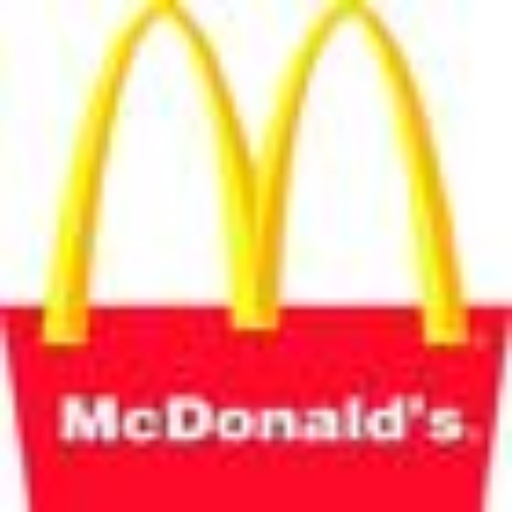

In [32]:
from IPython.display import Image

# Specify the path to your image file
image_path = "D:\\TY B.Sc DS\\Sem 6\\Project\\data(fake logo detection)\\train\\Genuine\\000001_08f7fb807cfd478b9f8eeb70e435e3df.jpg"

# Display the image
Image(filename=image_path)

In [33]:
prediction = predict_image(image_path)
if prediction < 0.5:
    print("The logo in the image is genuine.")
else:
    print("The logo in the image is fake.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
The logo in the image is fake.


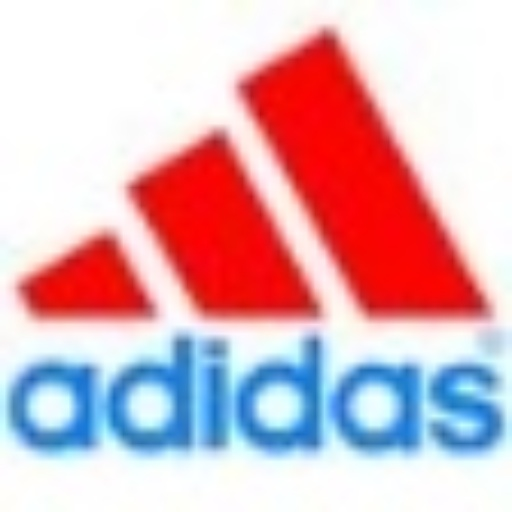

In [34]:
from IPython.display import Image

# Specify the path to your image file
image_path = "D:\\TY B.Sc DS\\Sem 6\\Project\\data(fake logo detection)\\test\\Fake\\scal_000002_04e179362be54688a32b846133994927.jpg"

# Display the image
Image(filename=image_path)

In [35]:
prediction = predict_image(image_path)
if prediction < 0.5:
    print("The logo in the image is genuine.")
else:
    print("The logo in the image is fake.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
The logo in the image is genuine.


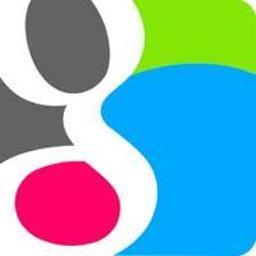

In [36]:
from IPython.display import Image

# Specify the path to your image file
image_path = "D:\\TY B.Sc DS\\Sem 6\\Project\\data(fake logo detection)\\training\\4.jpg"

# Display the image
Image(filename=image_path)

In [37]:
prediction = predict_image(image_path)
if prediction < 0.5:
    print("The logo in the image is genuine.")
else:
    print("The logo in the image is fake.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
The logo in the image is fake.


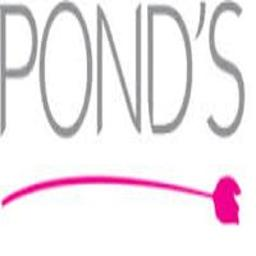

In [38]:
from IPython.display import Image

# Specify the path to your image file
image_path = "D:\\TY B.Sc DS\\Sem 6\\Project\\data(fake logo detection)\\training\\a(26).jpg"

# Display the image
Image(filename=image_path)

In [39]:
prediction = predict_image(image_path)
if prediction < 0.5:
    print("The logo in the image is genuine.")
else:
    print("The logo in the image is fake.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
The logo in the image is fake.


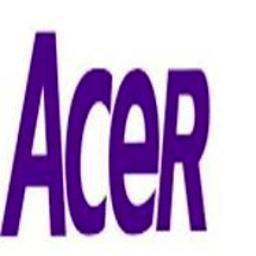

In [40]:
from IPython.display import Image

# Specify the path to your image file
image_path = "D:\\TY B.Sc DS\\Sem 6\\Project\\data(fake logo detection)\\training\\acer (18).jpg"

# Display the image
Image(filename=image_path)

In [41]:
prediction = predict_image(image_path)
if prediction < 0.5:
    print("The logo in the image is genuine.")
else:
    print("The logo in the image is fake.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
The logo in the image is fake.


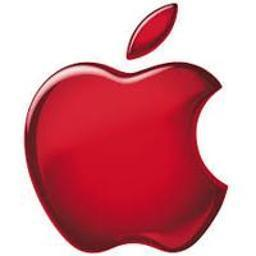

In [42]:
from IPython.display import Image

# Specify the path to your image file
image_path = "D:\\TY B.Sc DS\\Sem 6\\Project\\data(fake logo detection)\\training\\c(16).jpg"

# Display the image
Image(filename=image_path)

In [43]:
prediction = predict_image(image_path)
if prediction < 0.5:
    print("The logo in the image is genuine.")
else:
    print("The logo in the image is fake.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
The logo in the image is fake.


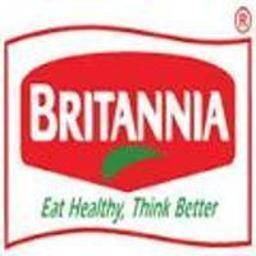

In [14]:
from IPython.display import Image

# Specify the path to your image file
image_path = "D:\\TY B.Sc DS\\Sem 6\\Project\\data(fake logo detection)\\training\\britannia (1).jpg"

# Display the image
Image(filename=image_path)

In [16]:
prediction = predict_image(image_path)
if prediction > 0.5:
    print("The logo in the image is genuine.")
else:
    print("The logo in the image is fake.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
The logo in the image is genuine.


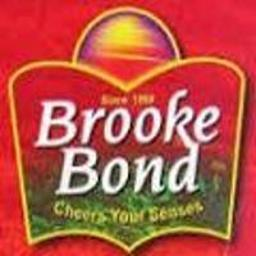

In [17]:
from IPython.display import Image

# Specify the path to your image file
image_path = "D:\\TY B.Sc DS\\Sem 6\\Project\\data(fake logo detection)\\training\\brooke bond (1).jpg"
# Display the image
Image(filename=image_path)

In [47]:
prediction = predict_image(image_path)
if prediction < 0.5:
    print("The logo in the image is genuine.")
else:
    print("The logo in the image is fake.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
The logo in the image is fake.


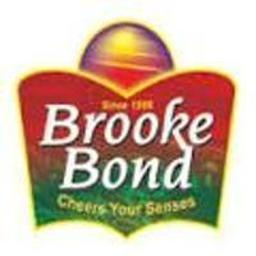

In [48]:
from IPython.display import Image

# Specify the path to your image file
image_path = "D:\\TY B.Sc DS\\Sem 6\\Project\\data(fake logo detection)\\training\\brooke bond (12).jpg"
# Display the image
Image(filename=image_path)

In [49]:
prediction = predict_image(image_path)
if prediction < 0.5:
    print("The logo in the image is genuine.")
else:
    print("The logo in the image is fake.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
The logo in the image is fake.


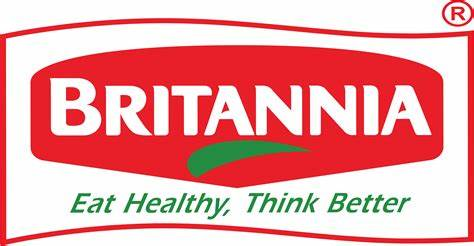

In [50]:
from IPython.display import Image

# Specify the path to your image file
image_path = "D:\\TY B.Sc DS\\Sem 6\\Project\\data(fake logo detection)\\OIP.jpeg"
# Display the image
Image(filename=image_path)

In [51]:
prediction = predict_image(image_path)
if prediction < 0.5:
    print("The logo in the image is genuine.")
else:
    print("The logo in the image is fake.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
The logo in the image is fake.


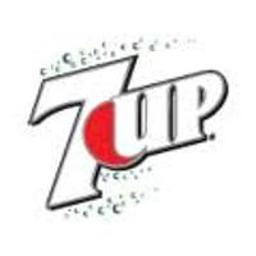

In [52]:
from IPython.display import Image

# Specify the path to your image file
image_path = "D:\\TY B.Sc DS\\Sem 6\\Project\\data(fake logo detection)\\training\\7up (6).jpg"
# Display the image
Image(filename=image_path)

In [53]:
prediction = predict_image(image_path)
if prediction < 0.5:
    print("The logo in the image is genuine.")
else:
    print("The logo in the image is fake.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
The logo in the image is fake.


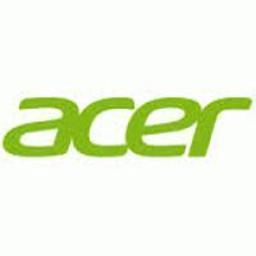

In [54]:
from IPython.display import Image

# Specify the path to your image file
image_path = "D:\\TY B.Sc DS\\Sem 6\\Project\\data(fake logo detection)\\training\\acer (3).jpg"
# Display the image
Image(filename=image_path)

In [55]:
prediction = predict_image(image_path)
if prediction < 0.5:
    print("The logo in the image is genuine.")
else:
    print("The logo in the image is fake.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
The logo in the image is fake.


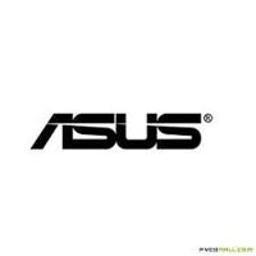

In [56]:
from IPython.display import Image

# Specify the path to your image file
image_path = "D:\\TY B.Sc DS\\Sem 6\\Project\\data(fake logo detection)\\training\\asus (27).jpg"
# Display the image
Image(filename=image_path)

In [57]:
prediction = predict_image(image_path)
if prediction < 0.5:
    print("The logo in the image is genuine.")
else:
    print("The logo in the image is fake.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
The logo in the image is fake.


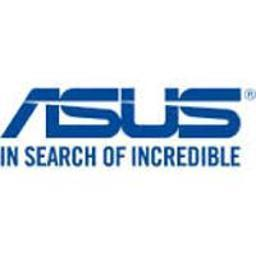

In [58]:
from IPython.display import Image

# Specify the path to your image file
image_path = "D:\\TY B.Sc DS\\Sem 6\\Project\\data(fake logo detection)\\training\\asus (11).jpg"
# Display the image
Image(filename=image_path)

In [59]:
prediction = predict_image(image_path)
if prediction < 0.5:
    print("The logo in the image is genuine.")
else:
    print("The logo in the image is fake.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
The logo in the image is fake.


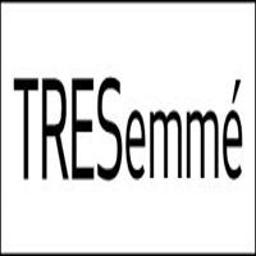

In [60]:
from IPython.display import Image

# Specify the path to your image file
image_path = "D:\\TY B.Sc DS\\Sem 6\\Project\\data(fake logo detection)\\training\\b(27).jpg"
# Display the image
Image(filename=image_path)

In [61]:
prediction = predict_image(image_path)
if prediction < 0.5:
    print("The logo in the image is genuine.")
else:
    print("The logo in the image is fake.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
The logo in the image is fake.


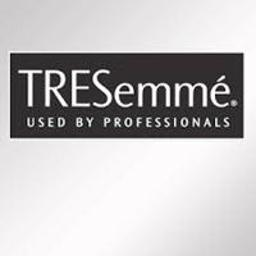

In [62]:
from IPython.display import Image

# Specify the path to your image file
image_path = "D:\\TY B.Sc DS\\Sem 6\\Project\\data(fake logo detection)\\training\\b(34).jpg"
# Display the image
Image(filename=image_path)

In [63]:
prediction = predict_image(image_path)
if prediction < 0.5:
    print("The logo in the image is genuine.")
else:
    print("The logo in the image is fake.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
The logo in the image is fake.


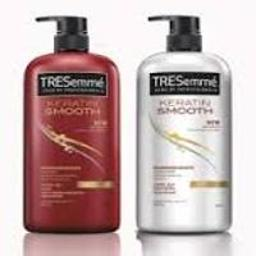

In [64]:
from IPython.display import Image

# Specify the path to your image file
image_path = "D:\\TY B.Sc DS\\Sem 6\\Project\\data(fake logo detection)\\training\\b(89).jpg"
# Display the image
Image(filename=image_path)

In [65]:
prediction = predict_image(image_path)
if prediction < 0.5:
    print("The logo in the image is genuine.")
else:
    print("The logo in the image is fake.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
The logo in the image is fake.


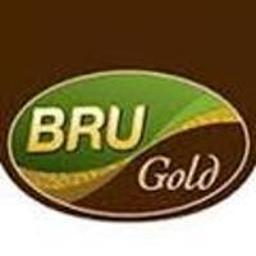

In [66]:
from IPython.display import Image

# Specify the path to your image file
image_path = "D:\\TY B.Sc DS\\Sem 6\\Project\\data(fake logo detection)\\training\\bru (26).jpg"
# Display the image
Image(filename=image_path)

In [67]:
prediction = predict_image(image_path)
if prediction < 0.5:
    print("The logo in the image is genuine.")
else:
    print("The logo in the image is fake.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
The logo in the image is fake.


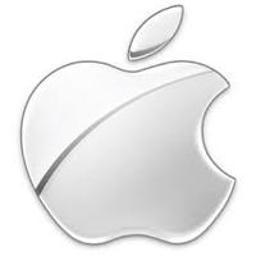

In [68]:
from IPython.display import Image

# Specify the path to your image file
image_path = "D:\\TY B.Sc DS\\Sem 6\\Project\\data(fake logo detection)\\training\\c(6).jpg"
# Display the image
Image(filename=image_path)

In [20]:
prediction = predict_image(image_path)
if prediction < 0.5:
    print("The logo in the image is genuine.")
else:
    print("The logo in the image is fake.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
The logo in the image is genuine.


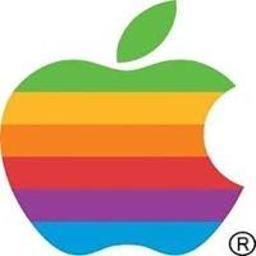

In [70]:
from IPython.display import Image

# Specify the path to your image file
image_path = "D:\\TY B.Sc DS\\Sem 6\\Project\\data(fake logo detection)\\training\\c(11).jpg"
# Display the image
Image(filename=image_path)

In [71]:
prediction = predict_image(image_path)
if prediction < 0.5:
    print("The logo in the image is genuine.")
else:
    print("The logo in the image is fake.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
The logo in the image is fake.


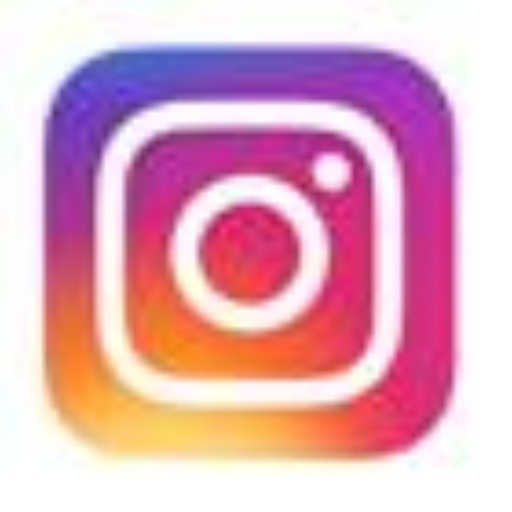

In [72]:
from IPython.display import Image

# Specify the path to your image file
image_path = "D:\\TY B.Sc DS\\Sem 6\\Project\\data(fake logo detection)\\train\\Genuine\\000001_1691f0b22e2d4ca794ac635bf747baab.jpg"
# Display the image
Image(filename=image_path)

In [18]:
prediction = predict_image(image_path)
if prediction < 0.5:
    print("The logo in the image is genuine.")
else:
    print("The logo in the image is fake.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
The logo in the image is genuine.


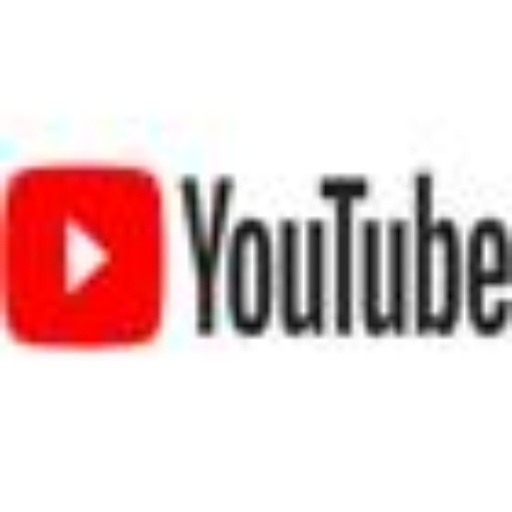

In [74]:
from IPython.display import Image

# Specify the path to your image file
image_path = "D:\\TY B.Sc DS\\Sem 6\\Project\\data(fake logo detection)\\train\\Genuine\\000002_6b89b275baab4dd2a13af38f016b960b.jpg"
Image(filename=image_path)

In [19]:
prediction = predict_image(image_path)
if prediction > 0.5:
    print("The logo in the image is genuine.")
else:
    print("The logo in the image is fake.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
The logo in the image is genuine.


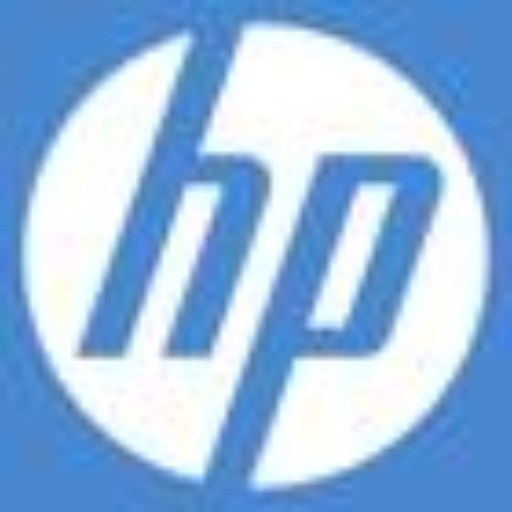

In [77]:
from IPython.display import Image

# Specify the path to your image file
image_path = "D:\\TY B.Sc DS\\Sem 6\\Project\\data(fake logo detection)\\train\\Genuine\\000001_c9437c96cfd7439c9f0ca5ce19a7472f.jpg"
Image(filename=image_path)

In [79]:
prediction = predict_image(image_path)
if prediction > 0.5:
    print("The logo in the image is genuine.")
else:
    print("The logo in the image is fake.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
The logo in the image is genuine.
